In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
type(lat_lngs)

zip

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Note this weird thing aboug this zip object, after you move it into a list or print it or into a dict, it becomes empty?

In [5]:
# Here this will not print anything, but if we move it to the step above, it will work but then the list in coordinates will be empty
for lat, lngs in lat_lngs:
    print(lat,lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
cities

['ushuaia',
 'araouane',
 'luzhou',
 'busselton',
 'puerto ayacucho',
 'bengkulu',
 'vaini',
 'rikitea',
 'vila velha',
 'gat',
 'kavaratti',
 'lasa',
 'mergui',
 'sentyabrskiy',
 'dubbo',
 'terrak',
 'airai',
 'khonuu',
 'westport',
 'yabelo',
 'nikolskoye',
 'waipawa',
 'chuy',
 'ponta do sol',
 'buala',
 'kodiak',
 'chokurdakh',
 'barrow',
 'jamestown',
 'cayenne',
 'manaure',
 'san simon de la laguna',
 'faanui',
 'santa cruz cabralia',
 'thinadhoo',
 'arraial do cabo',
 'dubenskiy',
 'illoqqortoormiut',
 'fort nelson',
 'takoradi',
 'limon',
 'soyo',
 'albany',
 'faya',
 'aquiraz',
 'kaitangata',
 'riyadh',
 'mehamn',
 'novikovo',
 'punta arenas',
 'tabou',
 'mana',
 'east london',
 'vardo',
 'karratha',
 'batagay',
 'puerto ayora',
 'svetlyy',
 'belushya guba',
 'hirara',
 'tilichiki',
 'magadan',
 'khatanga',
 'ribeira grande',
 'beitbridge',
 'mar del plata',
 'lavrentiya',
 'atuona',
 'mangan',
 'tuktoyaktuk',
 'liyang',
 'port elizabeth',
 'tsihombe',
 'upernavik',
 'taolanar

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url) --> Don't print and submit to github, otherwise you expose your private key for this API

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [11]:
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
#     city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]} | {city_url}")
    record_count += 1

Processing Record 1 of Set 1 | ushuaia | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289&q=ushuaia
Processing Record 2 of Set 1 | araouane | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289&q=araouane
Processing Record 3 of Set 1 | luzhou | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289&q=luzhou
Processing Record 4 of Set 1 | busselton | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289&q=busselton
Processing Record 5 of Set 1 | puerto ayacucho | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289&q=puerto+ayacucho
Processing Record 6 of Set 1 | bengkulu | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c815eceaa313446a6c15f1e221e9289&q=bengkulu
Processing Record 7 of Set 1 | vaini | http://api.openweathermap.o

In [12]:
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
#     print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | araouane
Processing Record 3 of Set 1 | luzhou
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | puerto ayacucho
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | gat
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | lasa
Processing Record 13 of Set 1 | mergui
City not found. Skipping...
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | dubbo
Processing Record 16 of Set 1 | terrak
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | khonuu
City not found. Skipping...
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | yabelo
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | waipawa
Processing Record 23 of Set 1 | chuy


Processing Record 36 of Set 4 | hualmay
Processing Record 37 of Set 4 | jalingo
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | garh maharaja
Processing Record 40 of Set 4 | manokwari
Processing Record 41 of Set 4 | straumen
Processing Record 42 of Set 4 | acapulco
Processing Record 43 of Set 4 | west bay
Processing Record 44 of Set 4 | hihifo
City not found. Skipping...
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | george town
Processing Record 48 of Set 4 | zhuhai
Processing Record 49 of Set 4 | utete
Processing Record 50 of Set 4 | russell
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | micheweni
Processing Record 4 of Set 5 | sao joao da barra
Processing Record 5 of Set 5 | yerbogachen
Processing Record 6 of Set 5 | butaritari
Processing Record 7 of Set 5 | wanning
Processing Record 8 of Set 5

Processing Record 22 of Set 8 | tongren
Processing Record 23 of Set 8 | paita
Processing Record 24 of Set 8 | odienne
Processing Record 25 of Set 8 | marand
Processing Record 26 of Set 8 | xadani
City not found. Skipping...
Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | harper
Processing Record 29 of Set 8 | ichinohe
Processing Record 30 of Set 8 | ballina
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | atyrau
Processing Record 33 of Set 8 | pak phanang
Processing Record 34 of Set 8 | anadyr
Processing Record 35 of Set 8 | kalabo
Processing Record 36 of Set 8 | valdivia
Processing Record 37 of Set 8 | chake chake
Processing Record 38 of Set 8 | bowen
Processing Record 39 of Set 8 | sioux lookout
Processing Record 40 of Set 8 | icanti
City not found. Skipping...
Processing Record 41 of Set 8 | meulaboh
Processing Record 42 of Set 8 | thompson
Processing Record 43 of Set 8 | birao
Processing Record 44 of Set 8 | yar-sale
Processing Record 45

Processing Record 10 of Set 12 | sao filipe
Processing Record 11 of Set 12 | nguiu
City not found. Skipping...
Processing Record 12 of Set 12 | porto novo
Processing Record 13 of Set 12 | mayumba
Processing Record 14 of Set 12 | kidal
Processing Record 15 of Set 12 | sempeter
City not found. Skipping...
Processing Record 16 of Set 12 | nsunga
Processing Record 17 of Set 12 | ongandjera
Processing Record 18 of Set 12 | paracatu
Processing Record 19 of Set 12 | yenagoa
Processing Record 20 of Set 12 | haines junction
Processing Record 21 of Set 12 | aklavik
Processing Record 22 of Set 12 | haibowan
City not found. Skipping...
Processing Record 23 of Set 12 | vazante
Processing Record 24 of Set 12 | east bethel
Processing Record 25 of Set 12 | asau
Processing Record 26 of Set 12 | kismayo
Processing Record 27 of Set 12 | rincon
Processing Record 28 of Set 12 | bela
Processing Record 29 of Set 12 | abu samrah
Processing Record 30 of Set 12 | burghausen
Processing Record 31 of Set 12 | kush

In [25]:
len(city_data)

571

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,61,40,10.36,AR,2021-06-06 23:21:28
1,Araouane,18.9048,-3.5265,96.96,19,61,6.78,ML,2021-06-06 23:21:08
2,Luzhou,28.8724,105.4405,75.58,76,99,3.76,CN,2021-06-06 23:27:39
3,Busselton,-33.6500,115.3333,46.09,78,0,7.83,AU,2021-06-06 23:24:26
4,Puerto Ayacucho,5.6639,-67.6236,78.44,87,81,1.25,VE,2021-06-06 23:27:39
5,Bengkulu,-3.8004,102.2655,73.58,89,25,3.71,ID,2021-06-06 23:26:27
6,Vaini,-21.2000,-175.2000,78.96,78,75,13.80,TO,2021-06-06 23:24:36
7,Rikitea,-23.1203,-134.9692,76.77,83,98,15.23,PF,2021-06-06 23:23:11
8,Vila Velha,-20.3297,-40.2925,73.35,90,0,1.01,BR,2021-06-06 23:26:43
9,Gat,31.6100,34.7642,68.68,74,0,1.36,IL,2021-06-06 23:27:40


In [28]:
new_column_order = ["City","Country","Date","Lat","Lng","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Lng,Lng,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-06-06 23:21:28,-54.8000,-68.3000,-68.3000,-68.3000,-68.3000,44.26,61,40,10.36
1,Araouane,ML,2021-06-06 23:21:08,18.9048,-3.5265,-3.5265,-3.5265,-3.5265,96.96,19,61,6.78
2,Luzhou,CN,2021-06-06 23:27:39,28.8724,105.4405,105.4405,105.4405,105.4405,75.58,76,99,3.76
3,Busselton,AU,2021-06-06 23:24:26,-33.6500,115.3333,115.3333,115.3333,115.3333,46.09,78,0,7.83
4,Puerto Ayacucho,VE,2021-06-06 23:27:39,5.6639,-67.6236,-67.6236,-67.6236,-67.6236,78.44,87,81,1.25
5,Bengkulu,ID,2021-06-06 23:26:27,-3.8004,102.2655,102.2655,102.2655,102.2655,73.58,89,25,3.71
6,Vaini,TO,2021-06-06 23:24:36,-21.2000,-175.2000,-175.2000,-175.2000,-175.2000,78.96,78,75,13.80
7,Rikitea,PF,2021-06-06 23:23:11,-23.1203,-134.9692,-134.9692,-134.9692,-134.9692,76.77,83,98,15.23
8,Vila Velha,BR,2021-06-06 23:26:43,-20.3297,-40.2925,-40.2925,-40.2925,-40.2925,73.35,90,0,1.01
9,Gat,IL,2021-06-06 23:27:40,31.6100,34.7642,34.7642,34.7642,34.7642,68.68,74,0,1.36


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

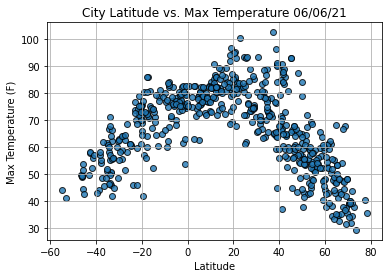

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

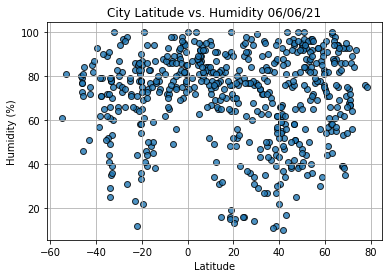

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

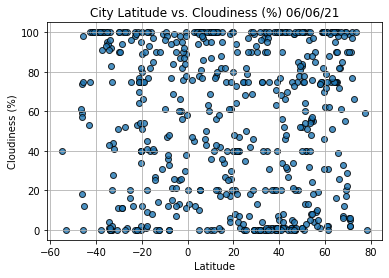

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

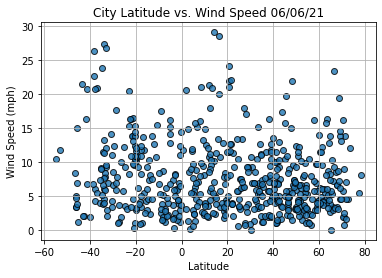

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()